<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/igib_project1_1_regreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [70]:
train = pd.read_csv("/content/drive/MyDrive/train (2).csv", index_col = 0)
test = pd.read_csv("/content/drive/MyDrive/test (1).csv", index_col = 0)

In [71]:
#since our data is already preprocessed so we skip thi step

In [72]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_D,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,0.259527,0.043794,0.189793,0.221014,-0.005179,0.057724,-0.267634,-0.483623,0.009653,-0.235960,0.126804,-0.252050,0.025138,-0.078163,-0.147870,-0.156324,-0.074290,0.156958,0.021454,-0.251038,0.077306,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068635,-0.042817,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,50.0,22.81,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,0.054202,-0.091866,0.021664,0.062931,-0.162113,0.025513,-0.307262,0.057044,0.049918,0.213271,0.022896,0.161115,-0.090165,-0.002233,-0.210391,-0.159603,-0.476597,-0.156384,0.233344,0.215493,0.051197,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.046619,-0.115272,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,62.0,19.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,-0.369900,-0.147031,-0.222059,-0.214122,0.049139,-0.188954,0.331578,-0.488139,-0.172344,-0.252019,0.152478,-0.171075,0.084777,0.007003,0.121134,0.298425,0.258907,-0.286528,-0.183427,-0.370122,-0.193184,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.251992,0.178245,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,72.0,21.34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,-0.330026,-0.120815,-0.291226,-0.178578,-0.302082,0.132234,-0.288862,-0.405542,-0.042374,0.157975,0.065657,-0.139909,-0.174547,-0.239952,-0.280853,0.022043,-0.232831,-0.197342,-0.028821,-0.272334,-0.133461,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,-0.296502,-0.191395,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,30.0,25.36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,-0.118551,-0.256500,0.003577,0.008358,-0.269961,0.120601,-0.249943,-0.086073,0.048850,-0.042623,-0.117136,0.068351,-0.400203,-0.293717,-0.281189,-0.185866,-0.354431,-0.298881,0.084251,0.018540,0.001034,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.145581,-0.072197,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,35.0,24.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [74]:
## Here we will check the percentage of nan values present in each feature for our soul satisfaction
## 1 -step make the list of features which has missing values
if_nan_feat=[features for features in train.columns if train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in if_nan_feat:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')
#no missing values found in our dataset

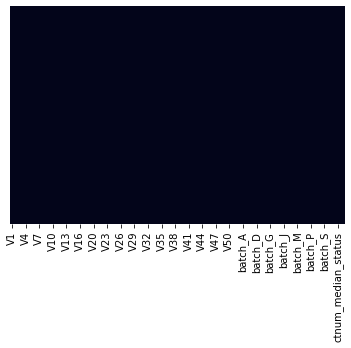

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

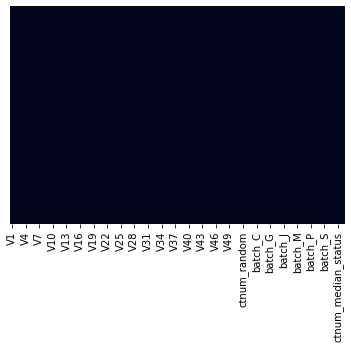

In [96]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [75]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()
#all features  and labels are numerical

Number of numerical variables:  74


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_D,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,0.259527,0.043794,0.189793,0.221014,-0.005179,0.057724,-0.267634,-0.483623,0.009653,-0.235960,0.126804,-0.252050,0.025138,-0.078163,-0.147870,-0.156324,-0.074290,0.156958,0.021454,-0.251038,0.077306,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068635,-0.042817,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,50.0,22.81,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,0.054202,-0.091866,0.021664,0.062931,-0.162113,0.025513,-0.307262,0.057044,0.049918,0.213271,0.022896,0.161115,-0.090165,-0.002233,-0.210391,-0.159603,-0.476597,-0.156384,0.233344,0.215493,0.051197,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.046619,-0.115272,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,62.0,19.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,-0.369900,-0.147031,-0.222059,-0.214122,0.049139,-0.188954,0.331578,-0.488139,-0.172344,-0.252019,0.152478,-0.171075,0.084777,0.007003,0.121134,0.298425,0.258907,-0.286528,-0.183427,-0.370122,-0.193184,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.251992,0.178245,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,72.0,21.34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,-0.330026,-0.120815,-0.291226,-0.178578,-0.302082,0.132234,-0.288862,-0.405542,-0.042374,0.157975,0.065657,-0.139909,-0.174547,-0.239952,-0.280853,0.022043,-0.232831,-0.197342,-0.028821,-0.272334,-0.133461,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,-0.296502,-0.191395,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,30.0,25.36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,-0.118551,-0.256500,0.003577,0.008358,-0.269961,0.120601,-0.249943,-0.086073,0.048850,-0.042623,-0.117136,0.068351,-0.400203,-0.293717,-0.281189,-0.185866,-0.354431,-0.298881,0.084251,0.018540,0.001034,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.145581,-0.072197,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,35.0,24.41,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [77]:
#here I drop batch_D bcz of my own silly mistake which was done during classification model
X_train = train.drop(['ctnum_random','batch_D'], axis = 1)

In [78]:
#here I drop V19 bcz of my own silly mistake which was done during classification model
X_test = test.drop(['ctnum_random','V19'], axis = 1)

In [80]:
y_train = train['ctnum_random'] #here ctnum is named as ctnum_random bcz i impute it using random imputation 

In [81]:
y_test = test['ctnum_random']

In [82]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F', 'batch_G',
       'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L', 'batch_M',
       'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R', 'batch_S',
       'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [83]:
scaling_feature=[feature for feature in X_train.columns ]
len(scaling_feature)

72

In [84]:
scaling_feature

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'agenum_random',
 'batch_A',
 'batch_B',
 'batch_C',
 'batch_E',
 'batch_F',
 'batch_G',
 'batch_H',
 'batch_I',
 'batch_J',
 'batch_K',
 'batch_L',
 'batch_M',
 'batch_N',
 'batch_O',
 'batch_P',
 'batch_Q',
 'batch_R',
 'batch_S',
 'batch_T',
 'batch_U',
 'ctnum_median_status',
 'infection']

In [86]:
feature_scale=[feature for feature in X_train.columns]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [87]:
scaler.transform(X_train[feature_scale])

array([[0.2153492 , 0.50705908, 0.27310052, ..., 0.        , 1.        ,
        1.        ],
       [0.8057128 , 0.75432576, 0.49914703, ..., 0.        , 0.        ,
        1.        ],
       [0.12196618, 0.24463078, 0.58201289, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.56280994, 0.68507055, 0.62578212, ..., 0.        , 0.        ,
        0.        ],
       [0.40894182, 0.51391346, 0.74859248, ..., 0.        , 0.        ,
        0.        ],
       [0.41186001, 0.414901  , 0.41800548, ..., 0.        , 0.        ,
        0.        ]])

In [88]:
scaler.transform(X_test[feature_scale])

array([[ 0.79813715,  0.72860002,  0.60649357, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.62862355,  0.76113097,  0.87764499, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1361191 ,  0.42683987,  0.56493495, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.53956725,  0.47042729,  0.66191557, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16212768,  0.05310628, -0.0181821 , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.87806271,  0.68346922,  0.5282658 , ...,  0.        ,
         0.        ,  1.        ]])

In [89]:
## for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty).
The bigger the alpha the less features that will be selected.

Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero

In [91]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [92]:
feature_sel_model.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True])

# let's print the number of total and selected features

In [93]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


total features: 72
selected features: 41
features with coefficients shrank to zero: 31


In [52]:
selected_feat

Index(['V1', 'V3', 'V4', 'V11', 'V12', 'V14', 'V17', 'V18', 'V21', 'V22',
       'V24', 'V26', 'V27', 'V28', 'V29', 'V31', 'V33', 'V34', 'V36', 'V37',
       'V38', 'V40', 'V41', 'V42', 'V50', 'agenum_random', 'batch_A',
       'batch_B', 'batch_C', 'batch_E', 'batch_H', 'batch_L', 'batch_N',
       'batch_O', 'batch_P', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status', 'infection'],
      dtype='object')

In [53]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [54]:
X_train.head()

,V1,V3,V4,V11,V12,V14,V17,V18,V21,V22,V24,V26,V27,V28,V29,V31,V33,V34,V36,V37,V38,V40,V41,V42,V50,agenum_random,batch_A,batch_B,batch_C,batch_E,batch_H,batch_L,batch_N,batch_O,batch_P,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
0,-0.330218,-0.210595,0.042186,0.259527,0.043794,0.221014,-0.267634,-0.483623,-0.235960,0.126804,0.025138,-0.147870,-0.156324,-0.074290,0.156958,-0.251038,0.072876,-0.002462,0.173432,0.124646,0.068635,0.068867,0.040792,-0.091723,-0.131632,50.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,0.426675,-0.024022,-0.013352,0.054202,-0.091866,0.062931,-0.307262,0.057044,0.213271,0.022896,-0.090165,-0.210391,-0.159603,-0.476597,-0.156384,0.215493,0.023161,-0.235664,-0.183999,0.050380,0.046619,0.012858,-0.002257,0.049109,0.139848,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.449942,0.044374,0.144829,-0.369900,-0.147031,-0.214122,0.331578,-0.488139,-0.252019,0.152478,0.084777,0.121134,0.298425,0.258907,-0.286528,-0.370122,-0.027064,-0.146378,-0.411870,-0.139977,-0.251992,-0.260547,-0.120370,-0.213245,-0.115021,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,-0.385247,-0.239616,-0.120262,-0.330026,-0.120815,-0.178578,-0.288862,-0.405542,0.157975,0.065657,-0.174547,-0.280853,0.022043,-0.232831,-0.197342,-0.272334,-0.190902,-0.188940,-0.302488,-0.300224,-0.296502,0.061595,-0.224197,-0.066983,0.272707,30.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
4,0.008941,-0.227340,-0.243443,-0.118551,-0.256500,0.008358,-0.249943,-0.086073,-0.042623,-0.117136,-0.400203,-0.281189,-0.185866,-0.354431,-0.298881,0.018540,-0.218953,-0.370742,-0.066994,-0.174827,-0.145581,-0.119244,-0.147377,0.056370,0.133435,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [55]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((652, 41), (121, 41), (652,), (121,))

Prediciton and selecting the Algorithm

In [97]:
import xgboost
xg = xgboost.XGBRegressor()

In [98]:
booster = ['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [99]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [100]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [101]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[17:05:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [102]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=15, min_child_weight=3,
             n_estimators=900)

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=3, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [67]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900, silent=True)

In [68]:
y_pred=regressor.predict(X_test)

In [69]:
y_pred

array([25.9637  , 21.800219, 18.555267, 22.765743, 23.950945, 23.881252,
       18.742105, 19.901001, 24.777243, 24.333672, 20.22374 , 23.876139,
       25.975508, 17.101168, 26.061743, 17.51197 , 21.59231 , 16.620998,
       18.87587 , 15.675769, 23.682579, 20.97214 , 24.713432, 19.940844,
       19.220165, 24.015537, 22.42496 , 21.847569, 23.274847, 24.741861,
       19.002012, 21.52414 , 20.904703, 18.838356, 18.363508, 18.922602,
       22.635689, 18.862862, 25.85686 , 19.760822, 24.456   , 23.66648 ,
       24.899628, 24.776354, 23.22117 , 23.463545, 23.628292, 25.581009,
       21.572596, 23.33763 , 23.647831, 18.347382, 19.963696, 18.819061,
       21.85209 , 23.332   , 17.725784, 19.85927 , 25.293566, 23.851954,
       20.538836, 25.793728, 23.607922, 24.986853, 22.455723, 19.829998,
       17.352846, 16.368914, 20.871912, 23.807148, 23.852972, 20.089336,
       23.677166, 21.941612, 23.502632, 17.570858, 26.92418 , 18.49057 ,
       20.252132, 21.60199 , 19.59595 , 20.349236, 